# Employee Satisfaction Survey

Synopse des Datensatzes: Der Datensatz enthält simulierte Mitarbeiterdetails als Features und allgemeine Zufriedenheit als Zielvariable. Er enthält 258 Datensätze und wurde als xml-Datei geteilt.  <break>

**Aufgabe:** 
- Untersuchung des Einflusses von soziodemographischen Faktoren auf die Mitarbeiterzufriedenheit (selective insights)
- Anwendung von Machine-Learning-Techniken unter Verwendung des beigefügten Datensatzes zur Vorhersage der Zielvariablen "Allgemeine Zufriedenheit".
<br>
    
Die folgenden Attribute sind gegeben:
<br>**Userschlüssel:** userschlüssel 
<br>**Gender:** Welchem Geschlecht fühlst du dich zugehörig?
<br>**Migrationshintergrund:** hast du einen Migrationshintergrund? 
<br>**Sexuelle Orientierung:** sexuelle Orientierung 
<br>**Generation:** generation 
<br>**Role level:** role level
<br>**Ability:** lebst du mit Erkrankungen oder Behinderungen?
<br>**Standort:** Standort
<br>**Betriebszugehörigkeit:** betriebszugehörigkeit
<br>**Chancengleichheit & Wertschätzung:**  Ich werde für meine Arbeit gewertschätzt.
<br>**Chancengleichheit & Wertschätzung:** Ich werde für meine Arbeit und Leistung fair entlohnt.
<br>**Karriereentwicklung:** In der Regel werde ich für Projekte eingesetzt, die mit meinen beruflichen Interessen und Zielen übereinstimmen.
<br>**Karriereentwicklung:** Ich führe mit meiner Führungskraft für mich persönlich relevante Gespräche über meine Entwicklung und Karriereziele.
<br>**Manager:innen-Beziehung:** Ich kann mit meiner Führungskraft über Unterstützung, die ich benötige, sprechen.
<br>**Manager:innen-Beziehung:** Ich kann mit meiner Führungskraft über mein Wohlbefinden sprechen.
<br>**Psychologische Sicherheit im Team:** Im Team kann ich offen sprechen, auch wenn meine Ideen/Eindrücke nicht mit denen von anderer übereinstimmen.erheit im Team
<br>**Psychologische Sicherheit im Team:** Ich kann mit meinem Team über mein Wohlbefinden sprechen.
<br>**Sichtbares DEI Leadership:** Die oberste Führungsebene bekennt sich zu Vielfalt und Inklusion bei [Unternehmen].
<br>**Sichtbares DEI Leadership:** Meine Führungskraft baut aktiv ein diverses und integratives Arbeitsumfeld auf.
<br>**Zugehörigkeit:** Mein Team zeigt Interesse daran mich als Person und das, was mich auszeichnet, kennenzulernen.
<br>**Zugehörigkeit:** Ich kann bei der Arbeit ich selber sein und muss meine Persönlichkeit nicht verstecken.
<br>**Work-Life Balance:** Ich bin in der Lage, eine angemessene Balance zwischen meiner Arbeit und meinem Privatleben zu finden.
<br>**Work-Life Balance:** Es ist möglich, einen gesunden Lebensstil zu haben und gleichzeitig erfolgreich bei [Unternehmen] zu sein.
<br>**Speak-Up:** Bei [Unternehmen] kann ich über ethische Themen sprechen oder berichten, ohne negative Folgen befürchten zu müssen.
<br>**Allgemeine Zufriedenheit:** allgemeine Zufriedenheit
<br>

Die Features "Chancengleichheit & Wertschätzung" bis "Allgemeine Zufriedenheit" werden als Likert-Skala angegeben, wobei 1 für "stimme überhaupt nicht zu" bis 5 für "stimme voll und ganz zu" steht.
<br>

Dieses Notebook ist wie folgt aufgebaut: Zunächst importieren wir die erforderlichen Libraries. Danach laden wir den Datensatz und werfen einen ersten Blick auf ihn mit Pandas. Nachdem wir uns die Features im dritten Teil des Notebooks genauer angesehen haben, wenden wir einige Techniken an, um Features zu entfernen, die für das maschinelle Lernen irrelevant sind. Schließlich trainieren wir das gewählte Machine-Learning-Modell mit unserem Trainingsdatensatz und diskutieren das Ergebnis.

### 1. Import libraries

Hier werden die erforderlichen Bibliotheken für die Datenmanipulation, Visualisierung und Modellierung importiert. Wir stellen auch die Größe der Figuren ein und stellen sicher, dass alle Kolumnen unseres Datensatzes angezeigt werden.

In [1]:
# data manipulation
import numpy as np
import pandas as pd

# data viz
import matplotlib.pyplot as plt
import seaborn as sns

# data modelling 
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
import sklearn.svm as svm
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import chi2, SelectKBest


pd.set_option('display.max_columns', None)
np.random.seed(42)
plt.rcParams['figure.figsize'] = [10, 5]

### 2. Exploratory Data Analysis

Hier wird der Datensatz in einen Pandas-Dataframe geladen, und da einige der Spaltennamen recht lang sind, werden sie wie folgt in kürzere umbenannt:

In [2]:
# load dataset into a dataframe and change column names

colnames = ['Userschlüssel', 'Gender', 'Migration', 'Orientierung', 'Generation', 'Role level', 'Ability',
           'Standort', 'Betriebszugehörigkeit', 'Arbeitswert', 'Fairer lohn', 'Karriereentwicklung_1', 
            'Karriereentwicklung_2', 'Manager Unterstützung', 'Manager Wohlfühlen', 'Team Ideen', 
            'Team Wohlfühlen', 'Ober_Bekenntnis zur Vielfalt', 'M_Bekenntnis zur Vielfalt', 'Zugehörigkeit_1', 
            'Zugehörigkeit_2', 'Work Life Balance1', 'Work Life Balance2', 'Speak Up', 'Allgemeine Zufriedenheit']

df_survey = pd.read_excel('/datasets/Inclusion_Diversity_Survey.xlsx', sheet_name=0, names=colnames)


df_survey.sample(10, random_state=42)

,Userschlüssel,Gender,Migration,Orientierung,Generation,Role level,Ability,Standort,Betriebszugehörigkeit,Arbeitswert,Fairer lohn,Karriereentwicklung_1,Karriereentwicklung_2,Manager Unterstützung,Manager Wohlfühlen,Team Ideen,Team Wohlfühlen,Ober_Bekenntnis zur Vielfalt,M_Bekenntnis zur Vielfalt,Zugehörigkeit_1,Zugehörigkeit_2,Work Life Balance1,Work Life Balance2,Speak Up,Allgemeine Zufriedenheit
165,10-360-8810,Nicht-binär,Kein Migrationshintergrund,Keine Angabe,Keine Angabe,Individual Contributor,Keine,Location B,1-3 Jahre,1,1,1,1,1,1,4,4,4,4,4,4,2,2,2,2
186,98-257-4798,Weiblich,Kein Migrationshintergrund,Heterosexuell,1996-present,Individual Contributor,Keine,HQ,1-3 Jahre,2,2,2,2,2,2,4,4,4,3,4,4,4,4,2,3
82,23-065-4277,Männlich,Kein Migrationshintergrund,Heterosexuell,1996-present,Individual Contributor,Keine,HQ,1-3 Jahre,4,4,4,4,2,2,4,4,4,4,4,4,4,4,4,4
30,25-923-7484,Männlich,Kein Migrationshintergrund,Heterosexuell,1946-1964,Sr. Manager,Keine,HQ,7-10 Jahre,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4
9,89-183-4406,Männlich,Kein Migrationshintergrund,Keine Angabe,1980-1995,Individual Contributor,Keine,HQ,1-3 Jahre,2,2,2,2,2,2,4,4,2,2,4,4,2,2,4,3
6,21-858-3597,Männlich,Kein Migrationshintergrund,Keine Angabe,1980-1995,Individual Contributor,Keine,HQ,1-3 Jahre,4,4,4,4,4,4,4,4,4,4,4,4,2,2,4,4
200,42-012-2481,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Individual Contributor,Keine Angabe,HQ,Keine Angabe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24,61-145-7449,Keine Angabe,Kein Migrationshintergrund,LGBTQ+,1996-present,Individual Contributor,Keine,HQ,1-3 Jahre,2,2,2,2,2,2,3,3,3,2,4,4,2,2,1,2
120,00-075-1629,Männlich,Kein Migrationshintergrund,Heterosexuell,1965-1979,Middle Manager,Neurodiversität,HQ,7-10 Jahre,3,3,2,2,2,2,4,4,4,2,4,4,2,2,4,3
101,25-566-8155,Männlich,Kein Migrationshintergrund,Heterosexuell,1996-present,Individual Contributor,Keine,HQ,1-3 Jahre,4,4,4,4,2,2,4,4,2,2,4,4,1,1,1,3


<br>
Anschließend wird mit info() eine Zusammenfassung des Datensatzes ausgegeben:

In [3]:
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Userschlüssel                 257 non-null    object
 1   Gender                        257 non-null    object
 2   Migration                     257 non-null    object
 3   Orientierung                  257 non-null    object
 4   Generation                    257 non-null    object
 5   Role level                    257 non-null    object
 6   Ability                       257 non-null    object
 7   Standort                      257 non-null    object
 8   Betriebszugehörigkeit         257 non-null    object
 9   Arbeitswert                   257 non-null    int64 
 10  Fairer lohn                   257 non-null    int64 
 11  Karriereentwicklung_1         257 non-null    int64 
 12  Karriereentwicklung_2         257 non-null    int64 
 13  Manager Unterstützun

Wir sehen, dass der Datensatz 257 Zeilen und 25 Spalten mit den Datentypen int und object enthält Wir sehen auch, dass es keine Nullwerte im Datensatz gibt.
<br>

Als Nächstes drucken wir die eindeutigen Werte in allen Spalten aus und vergleichen sie mit der ursprünglichen XML-Datei, um festzustellen, ob es zusätzliche Werte gibt.

In [4]:
# print unique values in all columns

df_survey.apply(lambda col: ', '.join(map(str, col.unique())))

Userschlüssel                   36-647-9000, 96-409-8137, 72-563-5783, 99-033-...
Gender                              Männlich, Weiblich, Nicht-binär, Keine Angabe
Migration                       Kein Migrationshintergrund, Migrationshintergr...
Orientierung                                  LGBTQ+, Keine Angabe, Heterosexuell
Generation                      1946-1964, 1965-1979, 1980-1995, 1996-present,...
Role level                      Individual Contributor, Middle Manager, Execut...
Ability                         Chronische Krankheit/Schmerzen, Keine Angabe, ...
Standort                                                           HQ, Location B
Betriebszugehörigkeit           11+ Jahre, 7-10 Jahre, 4-6 Jahre, 1-3 Jahre, K...
Arbeitswert                                                      2, 3, 4, 5, 1, 0
Fairer lohn                                                      2, 3, 4, 5, 1, 0
Karriereentwicklung_1                                            2, 4, 3, 5, 1, 0
Karriereentwickl

Wie in der xml-Datei angegeben, sehen wir, dass die Spalten, die Werte auf der Likert-Skala annehmen, in den meisten Fällen Werte zwischen 1 und 5 haben, wobei 0 "keine Angabe" entspricht. Auch bei den anderen Merkmalen scheint es keine Werte außerhalb der Norm zu geben. 
<br>
Da einige der Werte ausgeblendet sind, drucke ich sie in den folgenden Zellen aus, um alle Werte zu sehen:

In [5]:
print(df_survey['Migration'].unique())
print(df_survey['Generation'].unique())
print(df_survey['Ability'].unique())
print(df_survey['Betriebszugehörigkeit'].unique())

['Kein Migrationshintergrund' 'Migrationshintergrund' 'Keine Angabe']
['1946-1964' '1965-1979' '1980-1995' '1996-present' 'Keine Angabe']
['Chronische Krankheit/Schmerzen' 'Keine Angabe' 'Keine' 'Neurodiversität'
 'Mentale Erkrankung' 'Sonstige']
['11+ Jahre' '7-10 Jahre' '4-6 Jahre' '1-3 Jahre' 'Keine Angabe']


<br>
Als nächstes prüfe ich, ob es doppelte Zeilen gibt:

In [6]:
# are there duplicate rows

df_survey[df_survey.duplicated()]

,Userschlüssel,Gender,Migration,Orientierung,Generation,Role level,Ability,Standort,Betriebszugehörigkeit,Arbeitswert,Fairer lohn,Karriereentwicklung_1,Karriereentwicklung_2,Manager Unterstützung,Manager Wohlfühlen,Team Ideen,Team Wohlfühlen,Ober_Bekenntnis zur Vielfalt,M_Bekenntnis zur Vielfalt,Zugehörigkeit_1,Zugehörigkeit_2,Work Life Balance1,Work Life Balance2,Speak Up,Allgemeine Zufriedenheit


<br>
Ich überprüfe auch, wie viele Befragte in der Umfrage "keine Angabe" gewählt haben:

In [7]:
# keine Angabe values

df_survey[df_survey.eq("Keine Angabe").any(axis=1)]

,Userschlüssel,Gender,Migration,Orientierung,Generation,Role level,Ability,Standort,Betriebszugehörigkeit,Arbeitswert,Fairer lohn,Karriereentwicklung_1,Karriereentwicklung_2,Manager Unterstützung,Manager Wohlfühlen,Team Ideen,Team Wohlfühlen,Ober_Bekenntnis zur Vielfalt,M_Bekenntnis zur Vielfalt,Zugehörigkeit_1,Zugehörigkeit_2,Work Life Balance1,Work Life Balance2,Speak Up,Allgemeine Zufriedenheit
1,96-409-8137,Männlich,Kein Migrationshintergrund,LGBTQ+,1965-1979,Middle Manager,Keine Angabe,HQ,7-10 Jahre,3,3,2,2,2,2,4,4,4,4,4,4,2,2,4,3
6,21-858-3597,Männlich,Kein Migrationshintergrund,Keine Angabe,1980-1995,Individual Contributor,Keine,HQ,1-3 Jahre,4,4,4,4,4,4,4,4,4,4,4,4,2,2,4,4
8,26-989-9714,Männlich,Kein Migrationshintergrund,Keine Angabe,1980-1995,Individual Contributor,Keine,HQ,1-3 Jahre,2,2,2,2,2,2,4,4,4,4,4,4,4,4,4,3
9,89-183-4406,Männlich,Kein Migrationshintergrund,Keine Angabe,1980-1995,Individual Contributor,Keine,HQ,1-3 Jahre,2,2,2,2,2,2,4,4,2,2,4,4,2,2,4,3
10,91-093-6391,Männlich,Kein Migrationshintergrund,Keine Angabe,1980-1995,Individual Contributor,Keine,HQ,1-3 Jahre,4,4,4,4,4,4,3,3,3,3,4,3,2,2,2,3
11,68-529-9159,Männlich,Kein Migrationshintergrund,Keine Angabe,1980-1995,Individual Contributor,Keine,HQ,1-3 Jahre,2,2,2,2,2,2,4,4,4,4,4,4,2,2,4,3
12,22-619-0593,Männlich,Kein Migrationshintergrund,Keine Angabe,1996-present,Individual Contributor,Keine,HQ,1-3 Jahre,2,2,2,2,2,2,4,4,2,2,4,4,3,3,4,3
19,47-370-8842,Weiblich,Kein Migrationshintergrund,Keine Angabe,1980-1995,Individual Contributor,Keine,HQ,4-6 Jahre,4,4,4,4,4,4,5,5,4,4,4,4,2,2,2,4
20,92-156-6877,Nicht-binär,Kein Migrationshintergrund,Keine Angabe,1980-1995,Individual Contributor,Keine,HQ,1-3 Jahre,2,2,2,2,4,4,4,4,4,4,4,4,2,2,4,3
21,56-031-7520,Keine Angabe,Kein Migrationshintergrund,Keine Angabe,1980-1995,Individual Contributor,Keine,HQ,1-3 Jahre,2,2,2,2,2,2,4,4,4,2,4,4,2,2,4,3


In [8]:
len(df_survey[df_survey.eq("Keine Angabe").any(axis=1)])

49

Etwa 20 % der Befragten haben sich für diese Option entschieden, und viele von ihnen haben dies mit der Orientierungs-Feature getan. Das ist nicht überraschend, da es sich um eine sehr persönliche Frage handelt.
<br>
<br>
Ich bin auch daran interessiert, wie viele Personen auf der Likert-Skala 0 gewählt haben:

In [9]:
df_survey[df_survey.eq(0).any(axis=1)]

,Userschlüssel,Gender,Migration,Orientierung,Generation,Role level,Ability,Standort,Betriebszugehörigkeit,Arbeitswert,Fairer lohn,Karriereentwicklung_1,Karriereentwicklung_2,Manager Unterstützung,Manager Wohlfühlen,Team Ideen,Team Wohlfühlen,Ober_Bekenntnis zur Vielfalt,M_Bekenntnis zur Vielfalt,Zugehörigkeit_1,Zugehörigkeit_2,Work Life Balance1,Work Life Balance2,Speak Up,Allgemeine Zufriedenheit
180,72-536-1323,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Individual Contributor,Keine Angabe,HQ,Keine Angabe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
200,42-012-2481,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Individual Contributor,Keine Angabe,HQ,Keine Angabe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
225,65-089-6257,Keine Angabe,Keine Angabe,Keine Angabe,Keine Angabe,Individual Contributor,Keine Angabe,HQ,Keine Angabe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Da es nur drei Zeilen gibt, die dieser Bedingung entsprechen, und alle von ihnen beschlossen haben, bei den meisten Variablen keine Informationen zu liefern, habe ich diese Zeilen entfernt.

<br>
Ich werde auch die Spalte "Userschlüssel" gelöscht, da sie für den Algorithmus für maschinelles Lernen nicht relevant ist.

In [10]:
# drop rows with 0 and the Userschlüssel column

df_survey.drop(df_survey[df_survey.eq(0).any(axis=1)].index, inplace = True)
df_survey.drop(['Userschlüssel'], axis=1, inplace=True)

### 3. Understanding the features

Als Nächstes betrachten wir die Zielvariable und die Auswirkungen der verschiedenen Features auf sie genauer. Wir beginnen mit der Verteilung der Zielvariablen:

<AxesSubplot:title={'center':'Distribution of target variable'}, xlabel='Allgemeine Zufriedenheit', ylabel='Value Count'>

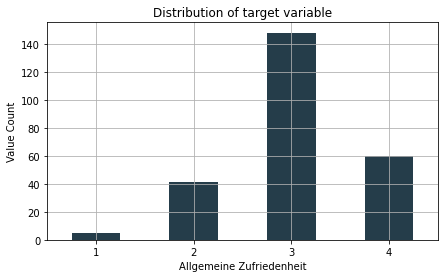

In [11]:
# target variable distribution

df_survey['Allgemeine Zufriedenheit'].value_counts().sort_index().plot(kind='bar',
                                                                       rot=0,
                                                                       figsize=(7,4),
                                                                       title="Distribution of target variable", 
                                                                       xlabel='Allgemeine Zufriedenheit',
                                                                       ylabel='Value Count',
                                                                       color='#253d4a',
                                                                       grid=True)

Hier sehen wir eine linksschiefe Verteilung, wobei die meisten Beobachtungen einer "3" auf der Likert-Skala entsprechen. Dies ist bei Umfragen durchaus üblich, da die meisten Teilnehmer den Wert "neutral" wählen.

Als Nächstes möchte ich sehen, wie die allgemeine Zufriedenheit mit einigen Features wie Geschlecht und sexuelle Orientierung variiert. Zu diesem Zweck habe ich eine Funktion definiert, die den Spaltennamen als Argument annimmt und ein Boxplot zurückgibt, das die Verteilung der Gesamtzufriedenheit für jede Kategorie in der Spalte zeigt.

In [12]:
def survey_dist(col_name):
    sns.boxplot(x=col_name, y="Allgemeine Zufriedenheit", data=df_survey, palette="Blues", 
            medianprops=dict(color="red", alpha=0.7))
    plt.title('Zufriedenheit nach {}'.format(col_name))

Beginnend mit dem Gender:

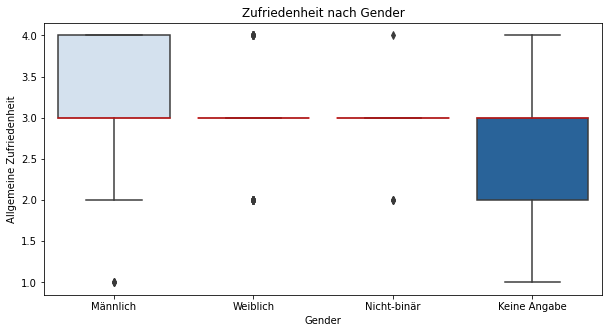

In [20]:
survey_dist('Gender')

So we see that all three categories have a median value of "3" but very different distributions. In the case of women and non-binary people, the median is coinciding with the lower and upper quartile of the box showing tha 50% of the participants have chosen to take a neutral stance. And none have ever chosen the value "1" - to show the least amount of overall satisfaction. While in the case of men, 1 is seen as an outlier. And it also shows a skewed distribution, with 50% of men choosing 3 or 4 on the scale. And therefore showing an overall greater satisfaction among men.

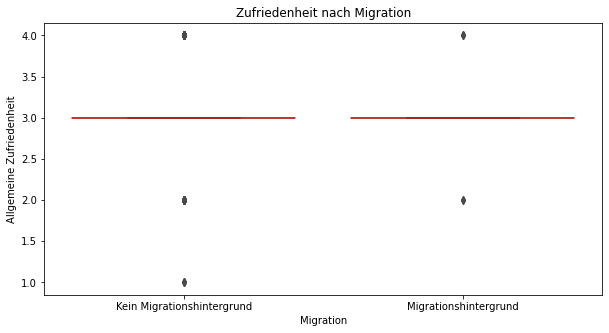

In [115]:
survey_dist('Migration')

Next looking at migration background, which are pretty similar again. Median value is coinciding with the lower and upper quartile in both cases, so about 50% of the participants have chosen neutral on the Likert scale. And it's again interesting to note that the people with a migration background have never chosen a 1. And we also see this trend below with the LGBTQ group under sexual orientation - so in all three categories that we looked at (gender, migration background and sexual orientation), none of the minority groups have expressed their dissatisfaction with their jobs.  
Does this mean that they are generally not unhappy with their jobs? I don't this so! I think this just shows a reluctance amongst these groups to show their dissatisfaction. A feeling of "at least I have a job". Because not every industry is accessible or welcome towards women or queer people. This was, to be honest, the most interesting part of the analysis for me.

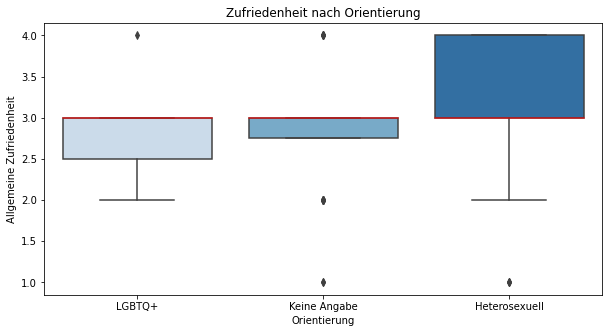

In [116]:
survey_dist('Orientierung')

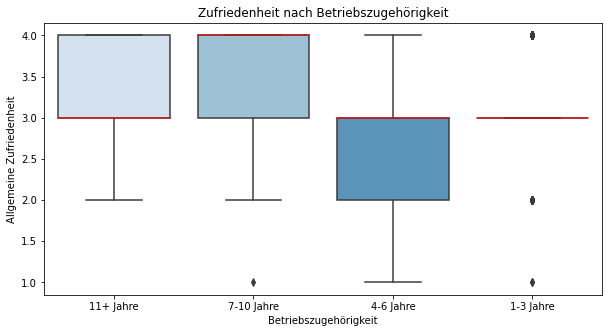

In [117]:
survey_dist('Betriebszugehörigkeit')

And finally, I also look at the "Betriebszugehörkeit" column. For me, the interesting part of this plot is this box plot right here. That employees who worked for 4-6 years at the company are less satisfied. This is generally around the time burnout sets in. Or you realize that this is not the career path for you. Or this is also when a lot of people get promotions at work, so maybe these people did not get it. And it also makes sense to me that people who have worked for a long time at the company are happier - this could be due to factors like higher pay.

### 4. Feature selection

In diesem Abschnitt werde ich einen Chi-Square-Test durchführen und auch nach Korrelationen zwischen den Features suchen. Dies hilft bei der Auswahl der relevantesten Features für den ML-Algorithmus, was zu einer besseren Leistung führt, indem die Trainingszeit und das Risiko einer "Overfitting" verringert werden.
<br>
Ich beginne mit der Durchführung eines Chi-Square-Tests. To this regard, I label encode the categorical features on a copy of the dataframe. Nach der Aufteilung in die Features und das Zielvariabel wird der Chi-Quadrat-Test durchgeführt und die p-values werden sowohl gedruckt als auch geplottet.

In [21]:
# label encode data before performing chi-square test

label_encoder = LabelEncoder()

new_df = df_survey.copy()

new_df[['Gender', 'Migration', 'Orientierung', 
           'Generation', 'Role level', 'Ability', 
           'Standort', 'Betriebszugehörigkeit']] = new_df[['Gender', 'Migration', 'Orientierung', 
                                                              'Generation', 'Role level', 'Ability',
                                                              'Standort', 'Betriebszugehörigkeit']
                                                            ].apply(label_encoder.fit_transform)

In [22]:
# split into features and target variable

X = new_df.drop('Allgemeine Zufriedenheit',axis=1)
y = new_df['Allgemeine Zufriedenheit']


# returns f-score and p-value 

chi_scores = chi2(X,y)
chi_scores

(array([12.29120207,  3.90131309, 10.22732338,  5.51078216,  1.37786336,
         3.87528977,  5.95360655, 25.18030615, 62.7784401 , 65.32662475,
        59.5989369 , 56.90706133, 47.59105631, 47.59105631, 18.19419863,
        18.61457829, 15.51218187, 20.92668781, 20.55301249, 20.49650842,
        27.78285556, 28.17406976, 13.84291803]),
 array([6.44937297e-03, 2.72319610e-01, 1.67294284e-02, 1.37995145e-01,
        7.10731787e-01, 2.75249289e-01, 1.13889313e-01, 1.41565431e-05,
        1.49775220e-13, 4.27061642e-14, 7.16022108e-13, 2.68999666e-12,
        2.60189680e-10, 2.60189680e-10, 4.01090279e-04, 3.28436158e-04,
        1.42736779e-03, 1.09032014e-04, 1.30351425e-04, 1.33917962e-04,
        4.03386927e-06, 3.33895308e-06, 3.12695575e-03]))

In [23]:
# print p-values in descending order

p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values

Role level                      7.107318e-01
Ability                         2.752493e-01
Migration                       2.723196e-01
Generation                      1.379951e-01
Standort                        1.138893e-01
Orientierung                    1.672943e-02
Gender                          6.449373e-03
Speak Up                        3.126956e-03
Ober_Bekenntnis zur Vielfalt    1.427368e-03
Team Ideen                      4.010903e-04
Team Wohlfühlen                 3.284362e-04
Zugehörigkeit_2                 1.339180e-04
Zugehörigkeit_1                 1.303514e-04
M_Bekenntnis zur Vielfalt       1.090320e-04
Betriebszugehörigkeit           1.415654e-05
Work Life Balance1              4.033869e-06
Work Life Balance2              3.338953e-06
Manager Unterstützung           2.601897e-10
Manager Wohlfühlen              2.601897e-10
Karriereentwicklung_2           2.689997e-12
Karriereentwicklung_1           7.160221e-13
Arbeitswert                     1.497752e-13
Fairer loh

Text(0.5, 1.0, 'Chi squared test based on p value')

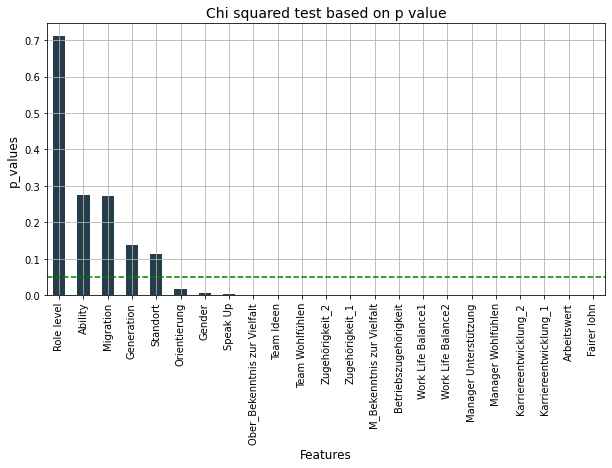

In [27]:
# p-values visualized

p_values.plot.bar(color='#253d4a', grid=True)
plt.axhline(y = 0.05, color = 'g', linestyle = '--')
plt.xlabel("Features", fontsize=12)
plt.ylabel("p_values", fontsize=12)
plt.title("Chi squared test based on p value", fontsize=14)

Features mit p > 0,05 sind nicht stark mit der Zielvariable assoziiert und werden daher nicht für die weitere ML-Modellierung ausgewählt. Zu diesen Merkmalen gehören **Role level, Ability, Migration, Standort** und **Generation**.

In [49]:
# drop features with p > 0.05

df_survey = df_survey.drop(['Role level', 'Ability', 'Migration', 'Standort', 'Generation'], axis=1)

<br>
Anschließend wird die Korrelation zwischen den Features berechnet und visualisiert:

<AxesSubplot:>

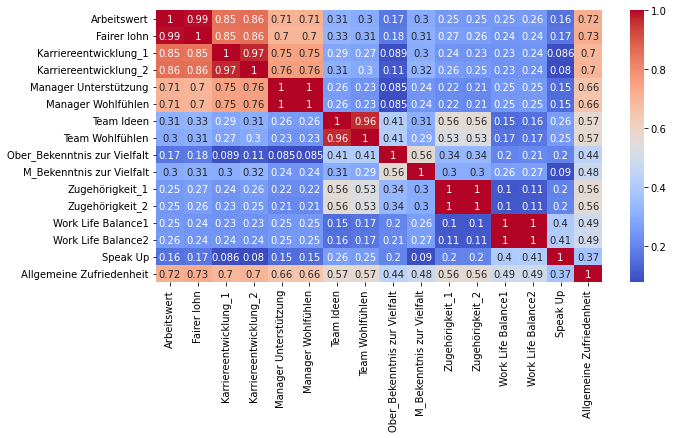

In [29]:
sns.heatmap(df_survey.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

Wir sehen eine starke Korrelation zwischen einigen der Features wie Arbeitswert und Fairer Lohn. Wenn die Korrelation größer als 0,95 ist, wird eines der Features weggelassen, wodurch die Dimensionalität reduziert wird. 

In [31]:
# calculate correlation matrix

corr_matrix = df_survey.corr().abs()

# get upper triangle of correlation matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# find features with correlation greater than 0.95

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print("The columns to be dropped are:", to_drop)

The columns to be dropped are: ['Fairer lohn', 'Karriereentwicklung_2', 'Manager Wohlfühlen', 'Team Wohlfühlen', 'Zugehörigkeit_2', 'Work Life Balance2']


/tmp/ipykernel_3981/4142153311.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [50]:
# drop highly correlated features

df_survey.drop(to_drop, axis=1, inplace=True)

### 5.1 Feature Engineering

Anschließend werden für jede Feature-Variable Dummy-Variablen mittels One-Hot-Encoding erstellt. Die ursprünglichen Spalten werden dann gelöscht.

In [51]:
# One-Hot Encoding

dummies_columns = ['Gender', 'Orientierung', 'Betriebszugehörigkeit']

for col in dummies_columns:
    df_survey = df_survey.merge(pd.get_dummies(df_survey[col], drop_first=True, prefix=str(col)),
                                left_index=True, right_index=True)

In [52]:
# drop the dummy columns

df_survey.drop(dummies_columns, axis=1, inplace=True)

### 5.2 Support Vector Machine [tbd]

Nach der Trennung der Features und der Zielvariablen wird der Datensatz in Trainings-, Test- und Validierungsdatensätze aufgeteilt (70-15-15). Das Modell ist nun bereit für das Training.

In [53]:
# split into features and target variable

X = df_survey.drop('Allgemeine Zufriedenheit',axis=1)
y = df_survey['Allgemeine Zufriedenheit']


# split dataset into 70% train, 15% test, 15% validation sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [54]:
# create a svm classifier
svc = svm.SVC(kernel='linear')

# train the model using the training sets
svc.fit(X_train, y_train)

# predict the response for test dataset
y_pred_svc = svc.predict(X_test)

In [56]:
print(accuracy_score(y_pred_svc, y_test))
#print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

0.8717948717948718
              precision    recall  f1-score   support

           2       0.80      0.80      0.80         5
           3       0.95      0.84      0.89        25
           4       0.75      1.00      0.86         9

    accuracy                           0.87        39
   macro avg       0.83      0.88      0.85        39
weighted avg       0.89      0.87      0.87        39

